## Problem Statement
MyHom is a finance company that lends housing loans at the best and most affordable interest rates to customers. In recent times, the company incurred heavy losses due to loan defaults. Most applicants failed to repay the loan as per the promissory note.

In order to avoid such losses, the company has decided to build a system for identifying the loan defaulters automatically based on data. This will help the company to identify the potential applicants and ensure the smooth running of the entire process.

Now, the company challenges the Data Science community to build a smart AI system to predict the probability of an applicant defaulting the loan or not in the future.

In [68]:
#importing librarys from sklearn,pandas,imblearn and xgboost
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#sklearn librarys
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
import sklearn.metrics as metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
#pands,imblearn,xgboost librarys
from pandas.api.types import is_string_dtype
from imblearn.over_sampling import SMOTE
#ignoring the warnings
import warnings
warnings.filterwarnings("ignore")
#pd.set option is use to maximum rows and columns
pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns',100)

## Read the train data

In [69]:
#reading data
train= pd.read_csv("train_LZV4RXX.csv")
train.head()

,loan_id,age,education,proof_submitted,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none,loan_default
0,1,27,1.0,Aadhar,504264,820920,2,2,0,0
1,2,48,1.0,Aadhar,728556,831444,6,2,0,0
2,3,30,2.0,VoterID,642936,826092,0,0,0,1
3,4,28,1.0,Aadhar,746556,930924,0,0,0,0
4,5,29,1.0,Aadhar,1139880,1902000,0,0,0,0


In [70]:
#shape of data
train.shape

(7000, 10)

In [71]:
#checking data type of features
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   loan_id           7000 non-null   int64  
 1   age               7000 non-null   int64  
 2   education         6755 non-null   float64
 3   proof_submitted   7000 non-null   object 
 4   loan_amount       7000 non-null   int64  
 5   asset_cost        7000 non-null   int64  
 6   no_of_loans       7000 non-null   int64  
 7   no_of_curr_loans  7000 non-null   int64  
 8   last_delinq_none  7000 non-null   int64  
 9   loan_default      7000 non-null   int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 547.0+ KB


#  checking for null values

In [72]:
train.isnull().sum()

loan_id               0
age                   0
education           245
proof_submitted       0
loan_amount           0
asset_cost            0
no_of_loans           0
no_of_curr_loans      0
last_delinq_none      0
loan_default          0
dtype: int64

In [73]:
#finding percent of null values
Null_values_percentage=(train.isnull().sum().sum()/len(train))*100
Null_values_percentage

3.5000000000000004

In [74]:
#computing null values of catogoric features with mode
train['education'].fillna(train['education'].mode()[0], inplace=True)

In [75]:
train.isnull().sum()

loan_id             0
age                 0
education           0
proof_submitted     0
loan_amount         0
asset_cost          0
no_of_loans         0
no_of_curr_loans    0
last_delinq_none    0
loan_default        0
dtype: int64

In [76]:
train_categoric = train.select_dtypes(include = object)
train_categoric.columns

Index(['proof_submitted'], dtype='object')

In [77]:
train_numeric = train.select_dtypes(include=np.number)
train_numeric.columns

Index(['loan_id', 'age', 'education', 'loan_amount', 'asset_cost',
       'no_of_loans', 'no_of_curr_loans', 'last_delinq_none', 'loan_default'],
      dtype='object')

In [78]:
#removing Unnecessary column from data set 
train=train.drop(['loan_id'],axis=1)

<function matplotlib.pyplot.show(close=None, block=None)>

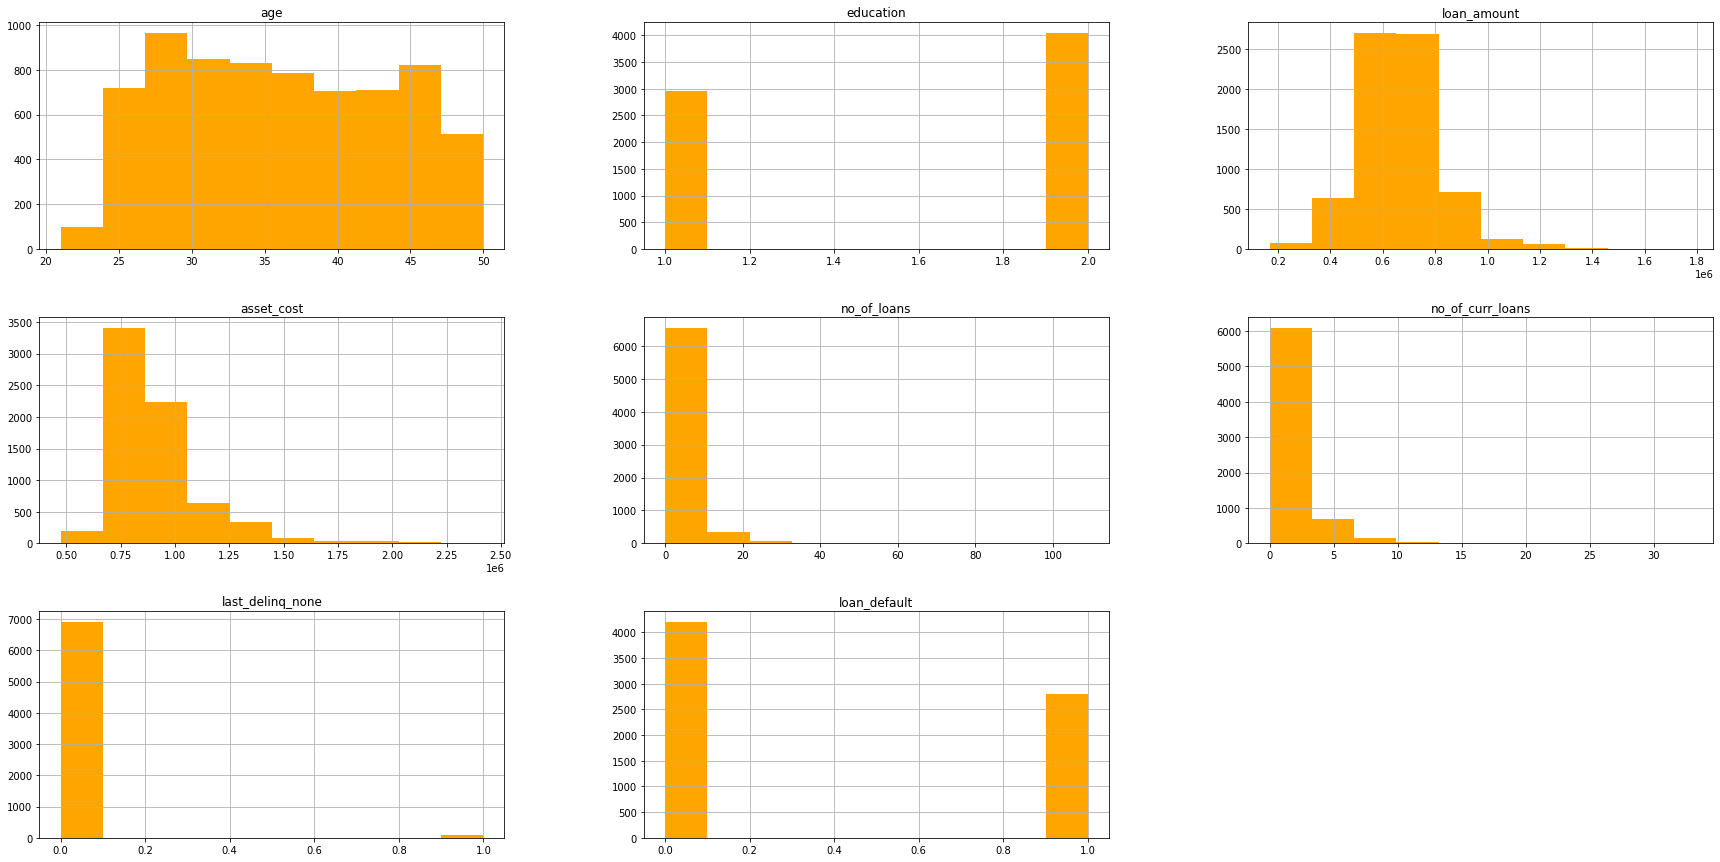

In [79]:
#ploting histogram to check distribution of data
train.hist( color = "orange",figsize=([30,15]))
plt.show

# finding co-relattoon

In [80]:
#checking co-realation of data
corr=train.corr()
corr

,age,education,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none,loan_default
age,1.000000,0.058155,-0.058011,-0.122741,0.193026,0.184503,0.050325,-0.029571
education,0.058155,1.000000,0.000562,0.089290,0.020395,-0.002614,0.023521,0.039905
loan_amount,-0.058011,0.000562,1.000000,0.735176,0.010867,0.014788,-0.009412,0.115736
asset_cost,-0.122741,0.089290,0.735176,1.000000,-0.052643,-0.054021,-0.023489,0.048020
no_of_loans,0.193026,0.020395,0.010867,-0.052643,1.000000,0.774705,0.235024,-0.045738
no_of_curr_loans,0.184503,-0.002614,0.014788,-0.054021,0.774705,1.000000,0.272716,-0.057306
last_delinq_none,0.050325,0.023521,-0.009412,-0.023489,0.235024,0.272716,1.000000,0.014772
loan_default,-0.029571,0.039905,0.115736,0.048020,-0.045738,-0.057306,0.014772,1.000000


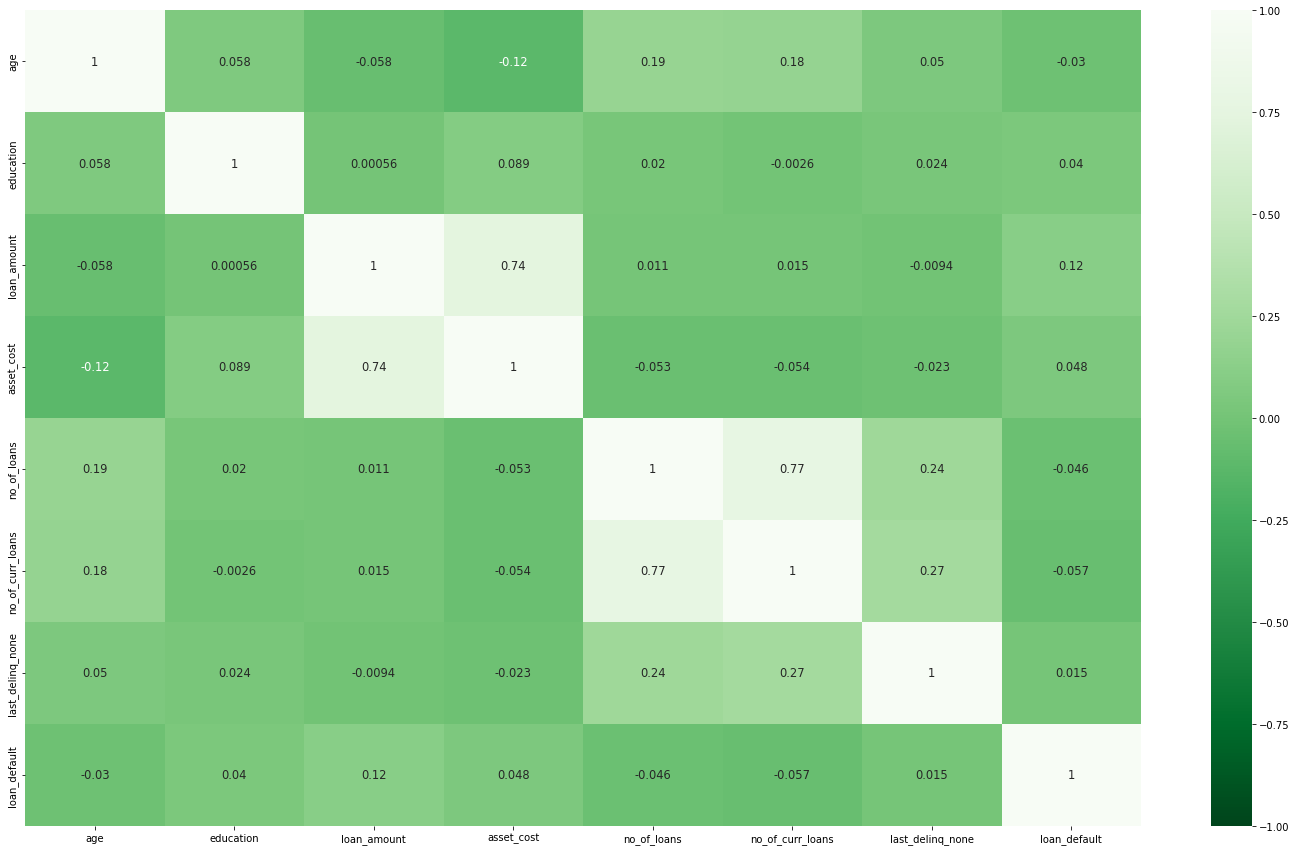

In [81]:
#ploting correlation
plt.figure(figsize = (25,15))
sns.heatmap(corr, annot = True, vmax = 1.0, vmin = -1.0, cmap = 'Greens_r', annot_kws = {"size": 11.5})
plt.show()

Text(0.5, 1.0, 'loan_default')

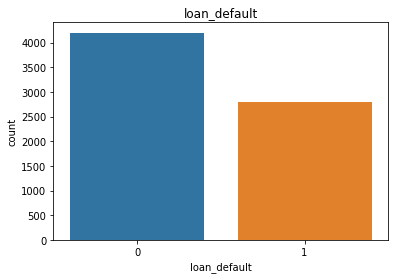

In [82]:
#ploting countplot to check distribution of data and numberof data present target column
sns.countplot(train['loan_default'])
plt.title('loan_default')

<AxesSubplot:xlabel='age', ylabel='count'>

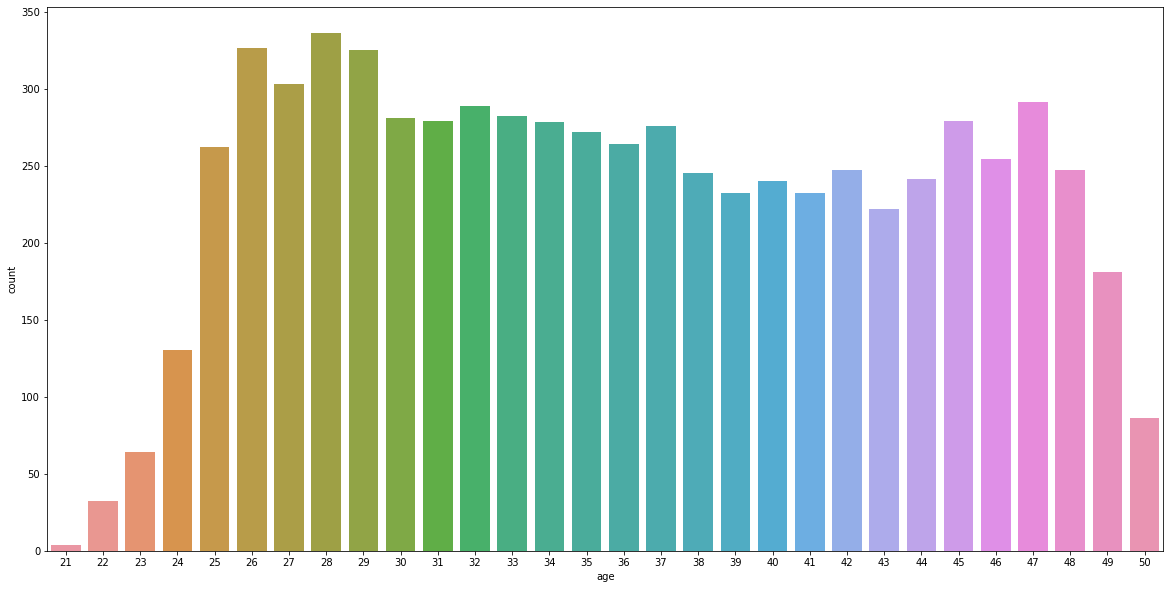

In [83]:
#ploting to check distribution of age column
plt.figure(figsize=[20,10])
sns.countplot(train['age'])

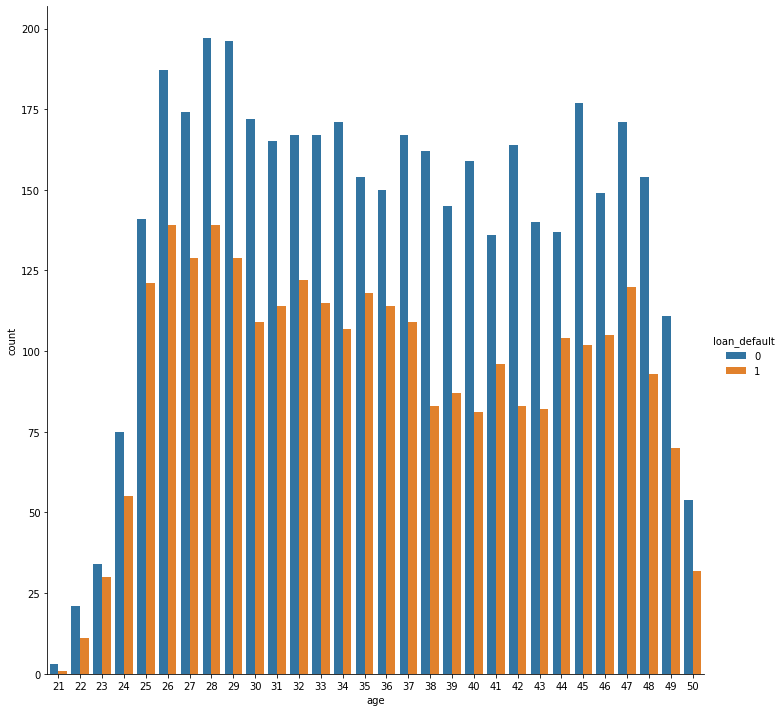

In [84]:
#comparission of age with attrition
sns.catplot(x='age',hue='loan_default',data=train,kind='count',height=10)

<AxesSubplot:xlabel='education', ylabel='count'>

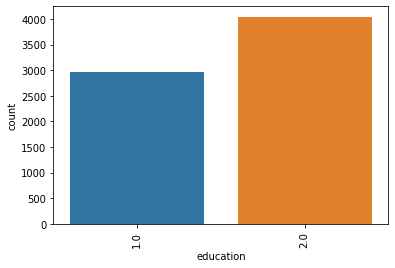

In [85]:
#checking  number of education using count plot
plt.xticks(rotation='vertical')
sns.countplot(train['education'])

In [86]:
#checking catagorical features
categoric = train.select_dtypes(include = object)
categoric.columns

Index(['proof_submitted'], dtype='object')

In [87]:
#checking numerical features
train_numeric = train.select_dtypes(include=np.number)
train_numeric.columns

Index(['age', 'education', 'loan_amount', 'asset_cost', 'no_of_loans',
       'no_of_curr_loans', 'last_delinq_none', 'loan_default'],
      dtype='object')

# encoding using dummy encoding

In [88]:
#making encoding for changing catagoricl values to numerical using dummy encoding
dummy_encode = pd.get_dummies(categoric, drop_first = True)

In [89]:
#joining the dummy encoded values and numeric values for future moddel building
train_data_dummy = pd.concat([train_numeric, dummy_encode], axis=1)
train_data_dummy.head()

,age,education,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none,loan_default,proof_submitted_Driving,proof_submitted_PAN,proof_submitted_Passport,proof_submitted_VoterID
0,27,1.0,504264,820920,2,2,0,0,0,0,0,0
1,48,1.0,728556,831444,6,2,0,0,0,0,0,0
2,30,2.0,642936,826092,0,0,0,1,0,0,0,1
3,28,1.0,746556,930924,0,0,0,0,0,0,0,0
4,29,1.0,1139880,1902000,0,0,0,0,0,0,0,0


# spliting data

In [90]:
#sepetaring target column(attrition) from dataset(spliting x and y)
X=train_data_dummy.drop(['loan_default'], axis = 1)
y=train_data_dummy[['loan_default']]

In [91]:
X.shape

(7000, 11)

In [92]:
y.shape

(7000, 1)

In [93]:
# Splitting Dataset into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
print("The shape of X_train is:",X_train.shape)
print("The shape of X_test is:",X_test.shape)
print("The shape of y_train is:",y_train.shape)
print("The shape of y_test is:",y_test.shape)

The shape of X_train is: (4900, 11)
The shape of X_test is: (2100, 11)
The shape of y_train is: (4900, 1)
The shape of y_test is: (2100, 1)


## model building

# logistic regression

In [94]:
# creating object for model
logisticRegr = LogisticRegression()
# Model Training
logisticRegr.fit(X_train, y_train)
# Making Predictions
y_pred_lr = logisticRegr.predict(X_test)
# Calculating Accuracy of the model
lr = round(accuracy_score(y_test, y_pred_lr)*100,2)
print(lr)

60.71


In [95]:
# confusion Matrix
cm = confusion_matrix(y_test, y_pred_lr)
print(cm)

[[1275    0]
 [ 825    0]]


In [96]:
# Classification Report for check accuracy
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.61      1.00      0.76      1275
           1       0.00      0.00      0.00       825

    accuracy                           0.61      2100
   macro avg       0.30      0.50      0.38      2100
weighted avg       0.37      0.61      0.46      2100



In [97]:
# checking target if data is balenced or not

In [98]:
#checking imbalence of data
y.value_counts()

loan_default
0               4200
1               2800
dtype: int64

## balencing data using SMOTE

In [99]:
#SMOTE (synthetic minority oversampling technique) is one of the most commonly used oversampling methods to solve the imbalance problem.
#It aims to balance class distribution by randomly increasing minority class examples by replicating them.

In [100]:
oversample = SMOTE()
smote = SMOTE(random_state = 1)
X1, y1 = oversample.fit_resample(X, y)
y1.value_counts()

loan_default
0               4200
1               4200
dtype: int64

In [101]:
#spliting data into train and test after smote
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.2, random_state = 1)
print("The shape of X_train is:",X_train.shape)
print("The shape of X_test is:",X_test.shape)
print("The shape of y_train is:",y_train.shape)
print("The shape of y_test is:",y_test.shape)

The shape of X_train is: (5880, 11)
The shape of X_test is: (2520, 11)
The shape of y_train is: (5880, 1)
The shape of y_test is: (2520, 1)


# Random forest

In [102]:
# Creating model object
model_r_f1 = RandomForestClassifier()
# Training Model
model_r_f1.fit(X_train, y_train)
# Making Prediction
y_pred_rf1 = model_r_f1.predict(X_test)
# Calculating Accuracy Score
rf1 = round(accuracy_score(y_test, y_pred_rf1)*100, 2)
print(rf1)

63.21


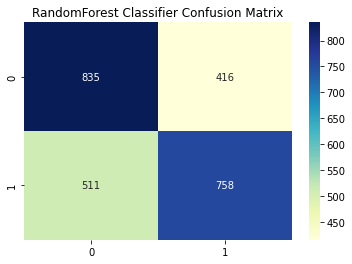

In [103]:
# confusion Maxtrix
cm3 = confusion_matrix(y_test, y_pred_rf1)
sns.heatmap(cm3, annot = True, fmt=  'd', cmap = 'YlGnBu')
plt.title("RandomForest Classifier Confusion Matrix",fontsize=12)
plt.show()

In [104]:
# Classification Report for check accuracy
print(classification_report(y_test,y_pred_rf1))

              precision    recall  f1-score   support

           0       0.62      0.67      0.64      1251
           1       0.65      0.60      0.62      1269

    accuracy                           0.63      2520
   macro avg       0.63      0.63      0.63      2520
weighted avg       0.63      0.63      0.63      2520



In [105]:
# after random forest our model doint giving higest accuracy so we use hyperparameter tuning  to protect our model from overfit or underfit

# random forest hyperpatametr tuning

In [106]:
# hyperparameter tuning using gridserch for randomforst classifer
from sklearn.model_selection import GridSearchCV
rfgridcv=GridSearchCV(estimator=RandomForestClassifier(),
param_grid=[{'n_estimators': [5,10,50],
                               'max_depth':[5,10,15,20],
                               'min_samples_leaf':[10,50,100],
                               'min_samples_split': [20,100,200]}])
rfgridcv.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [5, 10, 15, 20],
                          'min_samples_leaf': [10, 50, 100],
                          'min_samples_split': [20, 100, 200],
                          'n_estimators': [5, 10, 50]}])

In [107]:
y_pred_rgcv=rfgridcv.predict(X_test)
# Calculating Accuracy of the model
rgcv= round(accuracy_score(y_test, y_pred_rgcv)*100,2)
print(rgcv)

62.58


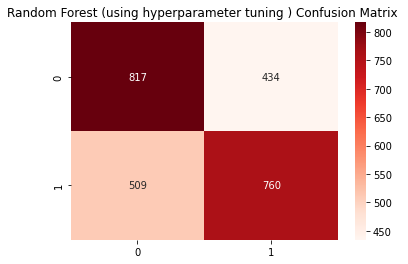

In [108]:
#confussion matrix for test data
cmm = confusion_matrix(y_test, y_pred_rgcv)
sns.heatmap(cmm, annot = True, fmt=  'd', cmap = 'Reds')
plt.title("Random Forest (using hyperparameter tuning ) Confusion Matrix ",fontsize=12)
plt.show()

In [109]:
#checking with sklearn cross validate
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
model = RandomForestClassifier(n_estimators=1000, random_state=1, criterion='entropy', bootstrap=True, oob_score=True, verbose=1)
cv_dict = cross_validate(model, X, y, return_train_score=True)
cv_dict

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   13.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   11.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[

{'fit_time': array([15.74993873, 13.50437117, 14.76244855, 16.09340334, 14.03482294]),
 'score_time': array([0.48943019, 0.45803428, 0.52203751, 0.55618334, 0.51758909]),
 'test_score': array([0.58857143, 0.57071429, 0.57357143, 0.57785714, 0.58857143]),
 'train_score': array([1.        , 0.99982143, 1.        , 0.99982143, 0.99982143])}

In [110]:
#after seeing this shows our model gridsearch cv not going any overfit or undrfit

## testing our model to future data and predicting for future data

# reading test data

In [111]:
#reading test data 
test_data = pd.read_csv("test_4zJg83n.csv")

In [112]:
#displaying
test_data.head()

,loan_id,age,education,proof_submitted,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none
0,7001,29,1.0,Aadhar,636936,768240,2,2,0
1,7002,28,1.0,Aadhar,548988,693060,3,3,0
2,7003,28,1.0,Aadhar,651756,936600,0,0,0
3,7004,45,2.0,Aadhar,614676,744840,4,3,0
4,7005,48,1.0,Aadhar,625236,839400,0,0,0


In [113]:
#checking shape
test_data.shape

(3000, 9)

In [114]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   loan_id           3000 non-null   int64  
 1   age               3000 non-null   int64  
 2   education         2908 non-null   float64
 3   proof_submitted   3000 non-null   object 
 4   loan_amount       3000 non-null   int64  
 5   asset_cost        3000 non-null   int64  
 6   no_of_loans       3000 non-null   int64  
 7   no_of_curr_loans  3000 non-null   int64  
 8   last_delinq_none  3000 non-null   int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 211.1+ KB


# checking for null values

In [115]:
test_data.isnull().sum()

loan_id              0
age                  0
education           92
proof_submitted      0
loan_amount          0
asset_cost           0
no_of_loans          0
no_of_curr_loans     0
last_delinq_none     0
dtype: int64

In [116]:
Null_values_percentage=(test_data.isnull().sum().sum()/len(test_data))*100
Null_values_percentage

3.0666666666666664

In [117]:
#computing null values of catogoric features with mode
test_data['education'].fillna(test_data['education'].mode()[0], inplace=True)

In [118]:
test_data.isnull().sum()

loan_id             0
age                 0
education           0
proof_submitted     0
loan_amount         0
asset_cost          0
no_of_loans         0
no_of_curr_loans    0
last_delinq_none    0
dtype: int64

# finding co-relation

In [119]:
# the describe() returns the statistical summary of the variables
# by default, it returns the summary of all categorical variables as tere are no numerical variables in the dataset
test_data.describe()

,loan_id,age,education,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none
count,3000.000000,3000.000000,3000.000000,3.000000e+03,3.000000e+03,3000.000000,3000.000000,3000.000000
mean,8500.500000,36.111000,1.577000,6.629294e+05,9.106000e+05,2.819000,1.374333,0.014333
std,866.169729,7.467347,0.494118,1.451009e+05,2.070278e+05,5.329575,2.218825,0.118881
min,7001.000000,21.000000,1.000000,1.696800e+05,4.706040e+05,0.000000,0.000000,0.000000
25%,7750.750000,30.000000,1.000000,5.801880e+05,7.930710e+05,0.000000,0.000000,0.000000
50%,8500.500000,36.000000,2.000000,6.541560e+05,8.569080e+05,0.000000,0.000000,0.000000
75%,9250.250000,42.000000,2.000000,7.315590e+05,9.501360e+05,4.000000,2.000000,0.000000
max,10000.000000,50.000000,2.000000,1.576920e+06,2.358180e+06,92.000000,32.000000,1.000000


In [120]:
#checking co-realation of data
corelation=test_data.corr()
corelation

,loan_id,age,education,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none
loan_id,1.000000,-0.014092,-0.014754,0.019097,-0.005795,-0.028111,-0.043389,-0.028631
age,-0.014092,1.000000,0.040835,-0.096555,-0.155379,0.207797,0.184371,0.065067
education,-0.014754,0.040835,1.000000,-0.044132,0.062528,0.011815,-0.008203,0.023779
loan_amount,0.019097,-0.096555,-0.044132,1.000000,0.755070,0.017017,0.000398,0.022136
asset_cost,-0.005795,-0.155379,0.062528,0.755070,1.000000,-0.053028,-0.066999,0.002588
no_of_loans,-0.028111,0.207797,0.011815,0.017017,-0.053028,1.000000,0.738552,0.203031
no_of_curr_loans,-0.043389,0.184371,-0.008203,0.000398,-0.066999,0.738552,1.000000,0.242590
last_delinq_none,-0.028631,0.065067,0.023779,0.022136,0.002588,0.203031,0.242590,1.000000


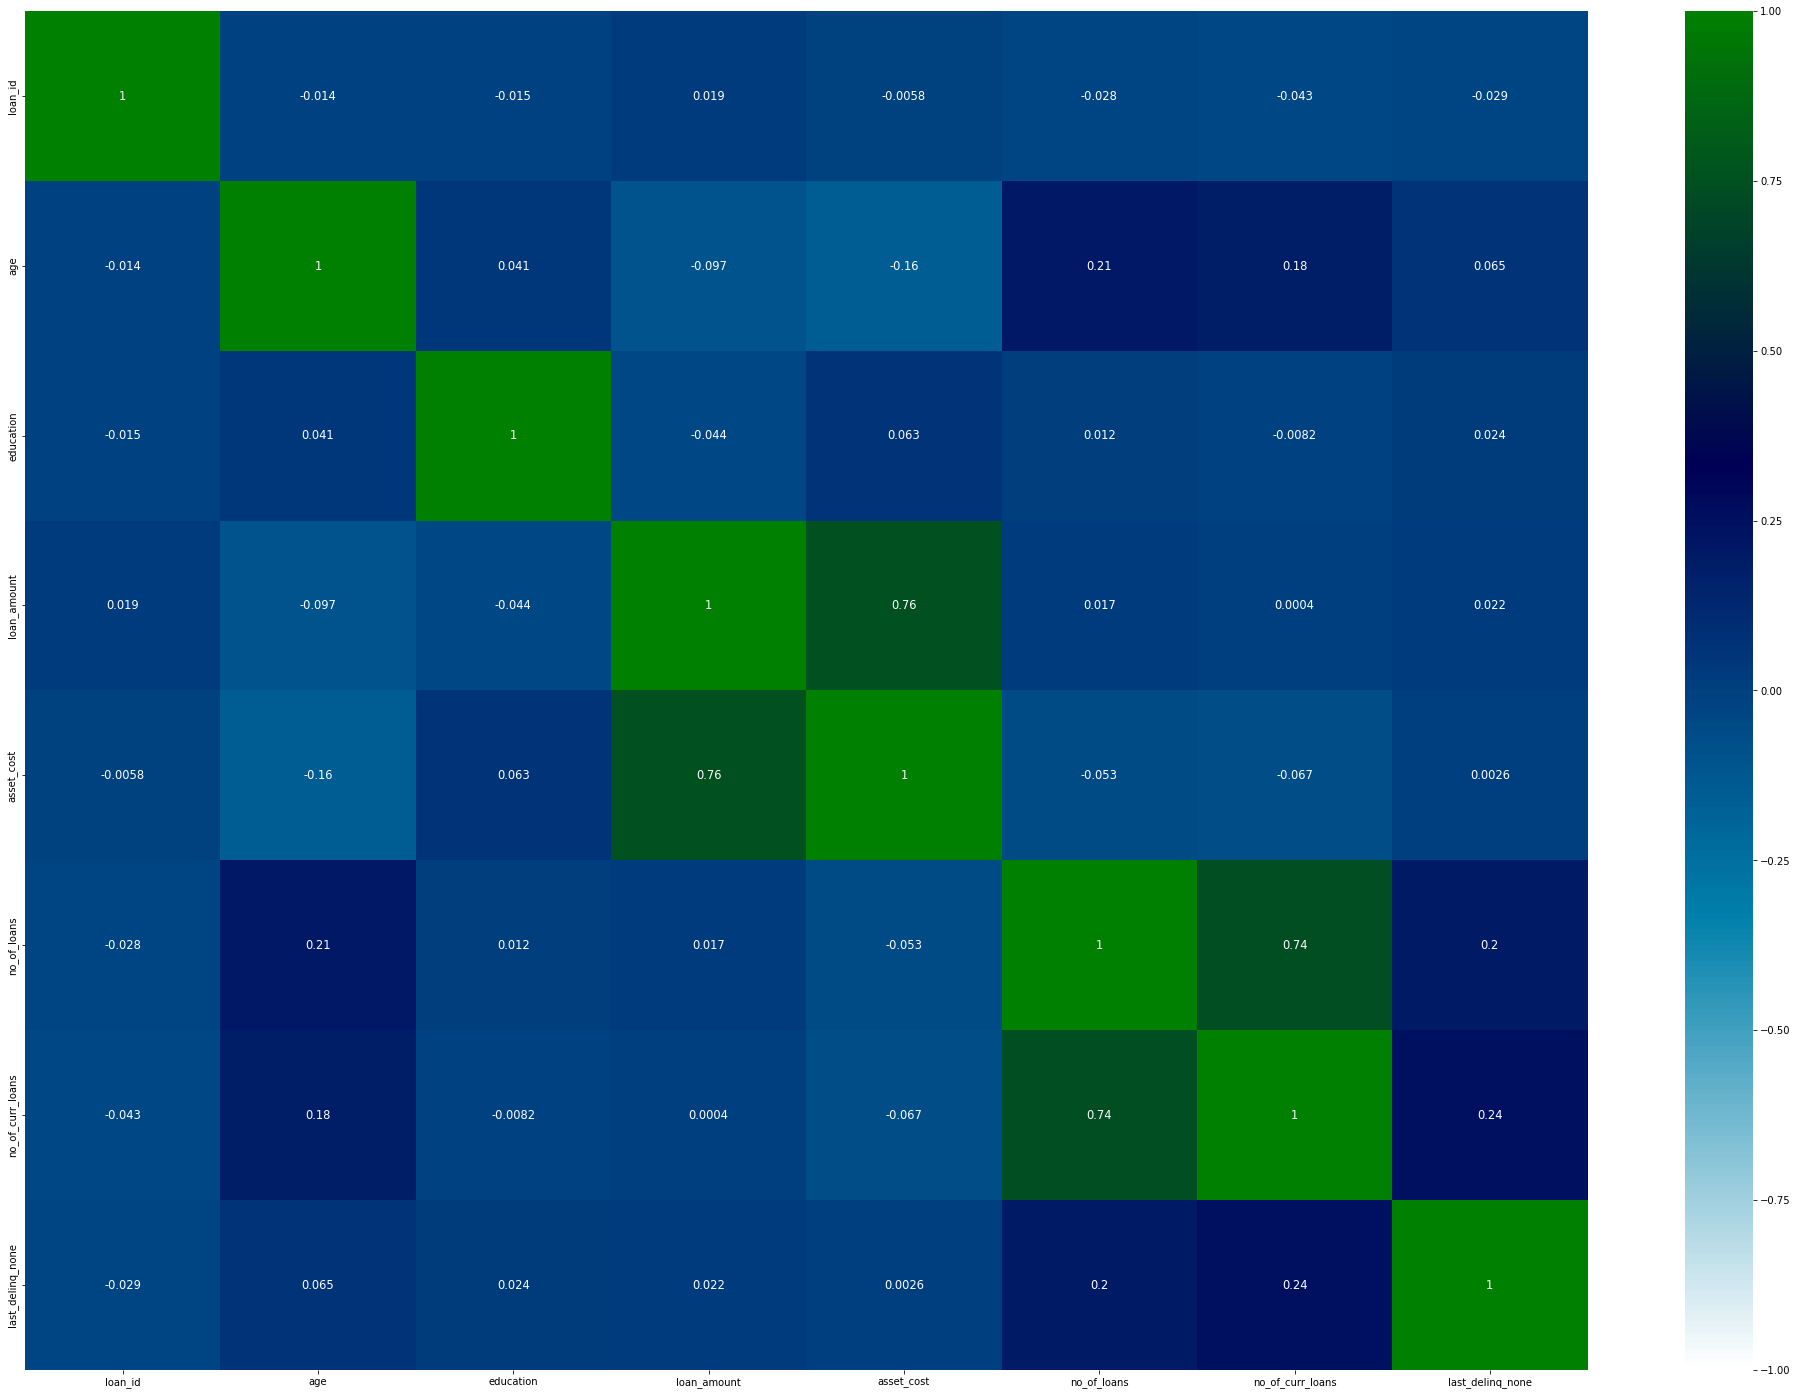

In [121]:
#ploting correlation
plt.figure(figsize = (35,25))
sns.heatmap(corelation, annot = True, vmax = 1.0, vmin = -1.0, cmap = 'ocean_r', annot_kws = {"size": 11.5})
plt.show()

In [122]:
#saving loan id for display future prediction 
ID_prediction=test_data["loan_id"]
ID_prediction.head()

0    7001
1    7002
2    7003
3    7004
4    7005
Name: loan_id, dtype: int64

In [123]:
#removing Unnecessary column from data set 
test_data=test_data.drop(['loan_id'],axis=1)

In [124]:
#checking numeric features
numeric_fea = test_data.select_dtypes(include=np.number)
numeric_fea.columns

Index(['age', 'education', 'loan_amount', 'asset_cost', 'no_of_loans',
       'no_of_curr_loans', 'last_delinq_none'],
      dtype='object')

In [125]:
#checking catagorical features
categoric = test_data.select_dtypes(include = object)
categoric.columns

Index(['proof_submitted'], dtype='object')

In [126]:
#making encoding for changing catagoricl values to numerical using dummy encoding
dummy_encoded = pd.get_dummies(categoric, drop_first = True)

In [129]:
#joining the dummy encoded values and numeric values for future moddel building
test_data_dummy = pd.concat([numeric_fea, dummy_encoded], axis=1)
test_data_dummy.head()

,age,education,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none,proof_submitted_Driving,proof_submitted_PAN,proof_submitted_Passport,proof_submitted_VoterID
0,29,1.0,636936,768240,2,2,0,0,0,0,0
1,28,1.0,548988,693060,3,3,0,0,0,0,0
2,28,1.0,651756,936600,0,0,0,0,0,0,0
3,45,2.0,614676,744840,4,3,0,0,0,0,0
4,48,1.0,625236,839400,0,0,0,0,0,0,0


In [130]:
#checking shape
test_data_dummy.shape

(3000, 11)

In [131]:
#pridiction of globle sales for test data using random forest hypertuned model
loan_default_predictions = rfgridcv.predict(test_data_dummy)
loan_default_predictions

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [132]:
#creating the dataframe for predicted values
df = pd.DataFrame(loan_default_predictions)
df.rename({0:"loan_default"},inplace =True,axis=1)

In [133]:
# joining the predicted values with loan Id
dataframe  = pd.DataFrame()
dataframe = pd.concat([ID_prediction.reset_index(drop=True),df.reset_index(drop=True)],axis=1)
dataframe

,loan_id,loan_default
0,7001,0
1,7002,0
2,7003,0
3,7004,0
4,7005,0
...,...,...
2995,9996,0
2996,9997,1
2997,9998,0
2998,9999,1


In [134]:
#save the file into csv file
dataframe.to_csv("loan_default_prediction.csv",index=False)